# Project 3

### Group members: Audrey Augenbraum, José Aveldanes, Ángel Mendiola Ross

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv")

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv")

/Users/angelmr/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# same for the 2014 data
chicago_inspections_2014.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2014.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

chicago_inspections_2014['Inspection_Date'] = pd.to_datetime(chicago_inspections_2014['Inspection_Date'], infer_datetime_format=True)  

## Visualization

What do inspections look like over time?

The inspections look very jagged--like inspections spike in certain months then drop the following month. They tend to drop the steepest during the winter holiday season (around November/December) and during the summer months of June and July.

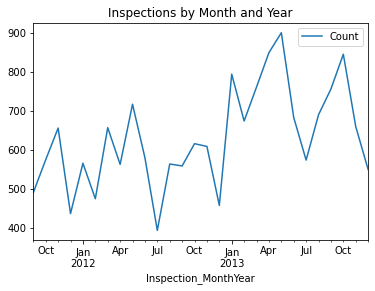

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year")

What do the results look like? 

The majority of restaurants (roughly 12,000) pass their inspections. Just under 4,000 fail and around 2,500 pass but with some conditions.

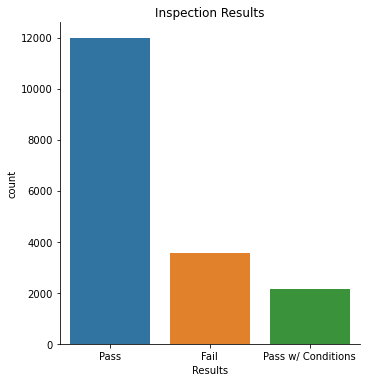

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

If we separate by facility type, we see the most of our dataset is comprised of restaurants and the majority pass their inspection (just under 8,000). Another 2,200 or so fail and less than 2,000 restaurants pass with conditions.

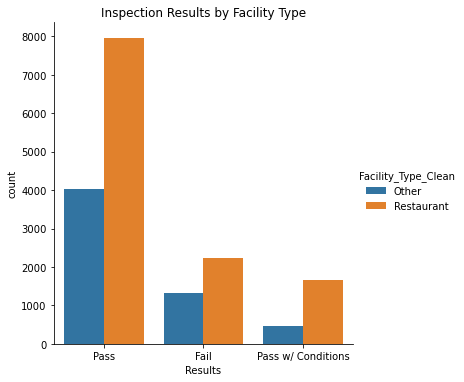

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [12]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Comment out the following code if you don't want to binarize the target variable
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)
# Recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

### Class Balance

Before we begin modeling, we want to visualize our target variable now that we binarized it.

/Users/angelmr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


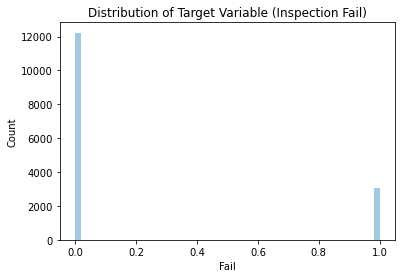

In [13]:
ax = sns.distplot(y, kde = False)
ax.set_title("Distribution of Target Variable (Inspection Fail)")
ax.set(xlabel='Fail', ylabel='Count')
plt.show()

As expected from the visualizations above, just under 4,000 inspections fail while roughly 12,000 inspections pass. We know that inbalanced datasets can present issues for machine learning so we'll need to be mindful of this as we assess model performance.

Checking for high correlation between features.

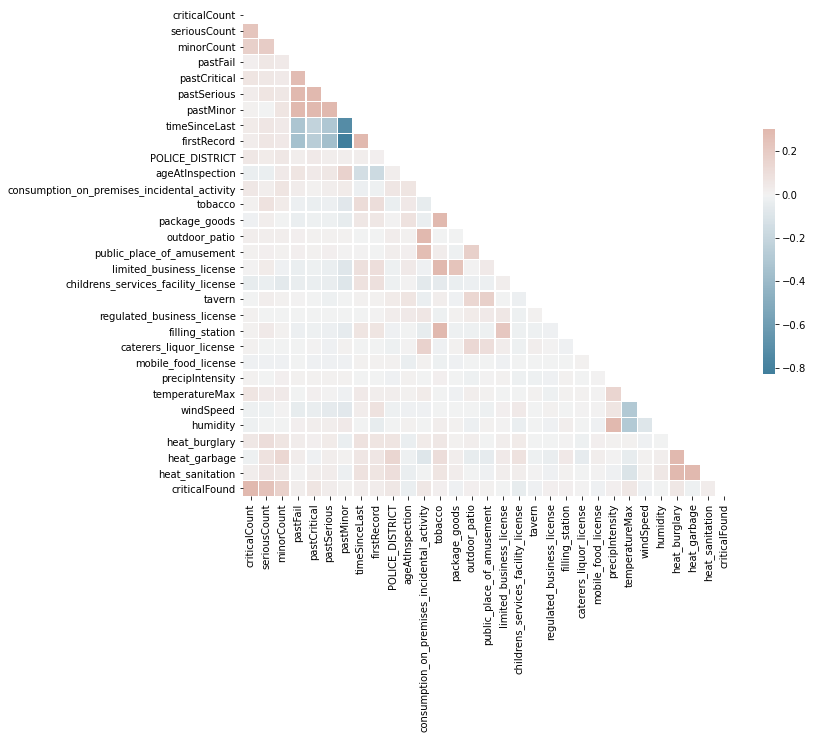

In [14]:
# Compute the correlation matrix
corr = chicago_inspections_2011_to_2013.drop(['Results'], axis = 1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Our biggest concerns (e.g., correlation >|0.8|) are between the first record (firstRecord) and the time since last inspection (timeSinceLast) as well as the first record (firstRecord) and past minor violation (pastMinor). Because we think it's important to keep both minor violations and the time since last inspection, we opt to drop firstRecord.

Now we are ready to create our X.

In [15]:
# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 'firstRecord'], axis = 1)
X = pd.get_dummies(X)

# same with 2014 X
X_test = chicago_inspections_2014.drop(columns = ['firstRecord'], axis = 1) # no 'Results' in 2014
X_test = pd.get_dummies(X_test)

In [16]:
X.head()
len(X.columns)

2041

In [17]:
X_test.head()
len(X_test.columns)

3023

### Data Splitting

Now we will separate our data into train and validate sets.

In [18]:
from sklearn.model_selection import train_test_split

# Set seed
np.random.seed(10)

X_train, X_validate, y_train, y_validate = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

First, we load the appropriate libraries from sklearn.

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

### Model 1: Random Forest

Setting up the hyperparameter grid to find the best parameters for our data.

In [ ]:
rf_classifier = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': [3, 5, 10, 15],
             'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4, 5],
              'max_features': ['None', 'auto', 'sqrt', 'log2'],
             'min_impurity_decrease': [1e-07],
             'random_state': [10]}

rf_grid_class = GridSearchCV(rf_classifier, param_grid, cv = 3)
rf_grid_class.fit(X_train, y_train)

best_index = np.argmax(rf_grid_class.cv_results_["mean_test_score"])
#best_rf_pred = rf_grid_class.best_estimator_.predict(X_validate)

parameters = []
parameters.append(rf_grid_class.cv_results_['params'][best_index])
parameters

Now we population a random forest classifier with the parameters identified above.

In [20]:
# Initialize a random forest based on the parameters identified above
rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=3,  # how deep tree nodes can go
                       min_samples_split=3,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       max_features=None,  # number of features to look for when splitting
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [21]:
# fit the model
rf_model = rf_classifier.fit(X_train, y_train.ravel())

y_pred = rf_model.predict(X_validate)

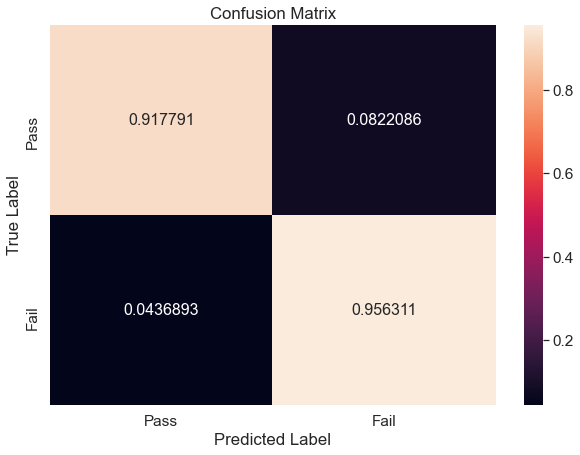

In [23]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The confusion matrix shows that our random forest model is very good a predicting both restaurants that will pass and restaurants that will fail. It doesn't appear like we need to resample due to our unbalanced target given how accurate our predictions are.

When examining feature importance (by fitting on the whole dataset rather than our training dataset), serious violations count is the most important feature by far, which makes a lot of sense. Those restaurants with more serious violations are more likely to fail their inspection.

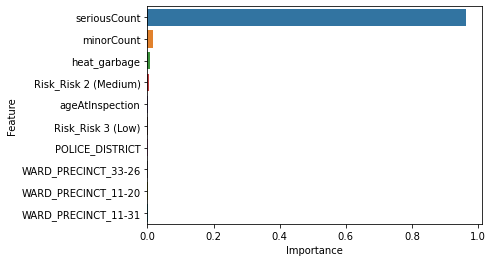

In [22]:
# Refit the random forest on the whole dataset to get feature importances
rf_classifier.fit(X, y.ravel())

feat_importances = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(rf_classifier.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

We can make a simpler tree focusing on the most important features, which vastly improves interpretability. It is clear that seriousCount is the most important feature, but let's just include the top six features because the rest of the top 10 look more like geographic features.

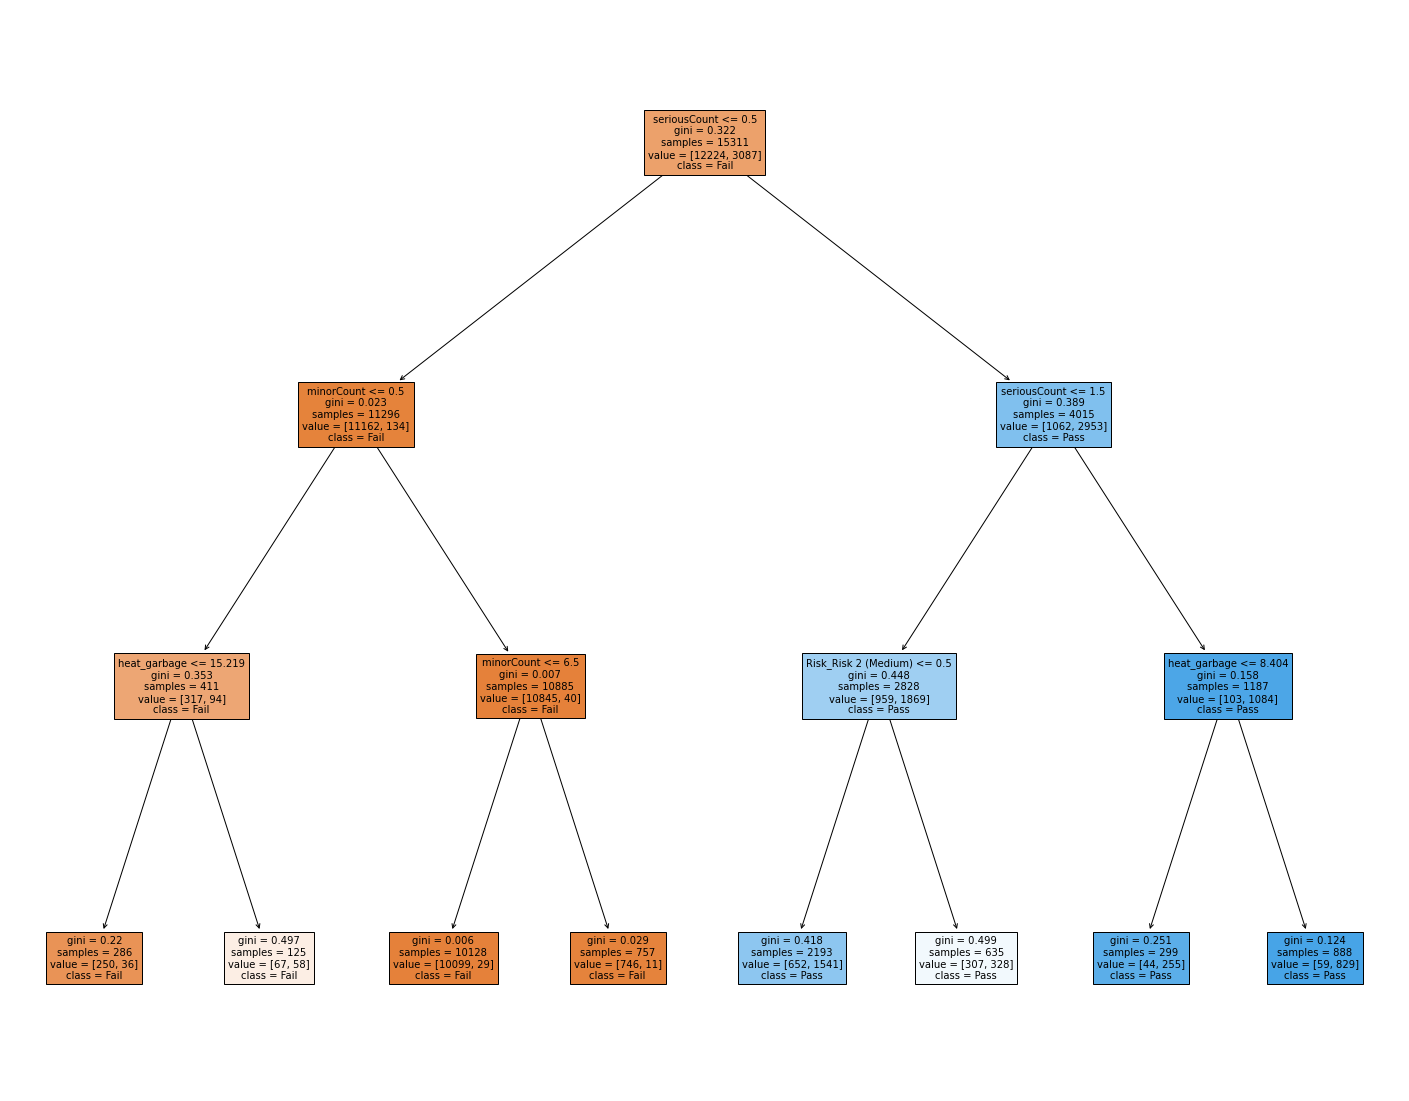

In [23]:
dt_reduced_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=3,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

important_features = feat_importances.nlargest(6, 'Importance')['Feature']

X_reduced = X[X.columns[X.columns.isin(important_features)]]


dt_reduced_classifier.fit(X_reduced, y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt_reduced_classifier, 
                   feature_names=X_reduced.columns,  
                   class_names=["Fail", "Pass"],
                   filled=True,
                  fontsize = 10,
                  max_depth = 5)

Going back to a decision tree rather than random forest improves interpretability but at the expense of accuracy. So let's see how our decision tree performs.

In [24]:
scores = cross_val_score(dt_reduced_classifier, X, y.ravel(), cv=5)
scores.mean()

0.9218208818811064

The model still performs quite well: 0.9218 accuracy.

## Model 2: SVM

Before estimating the support vector machine, we begin with hyperparameter tuning.

In [22]:
# create a model
svm_model = SVC()

param_grid = {'C': [40, 45, 50, 55, 60],
              'kernel': ['rbf'],
             'random_state': [10]}

svm_grid = GridSearchCV(svm_model, param_grid, cv=3, iid=False)
svm_grid.fit(X_train, y_train.ravel())

best_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
best_svm_pred = svm_grid.best_estimator_.predict(X_validate)

print(svm_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_svm_pred, y_validate))

{'C': 40, 'kernel': 'rbf', 'random_state': 10}
Validation Accuracy 0.9249102187397976


In [25]:
# building the model with the parameters identified above
svm = SVC(C = 40,
         kernel = 'rbf',
         random_state = 10)

# fit the model
svm_model = svm.fit(X_train, y_train.ravel())

y_pred = svm_model.predict(X_validate)

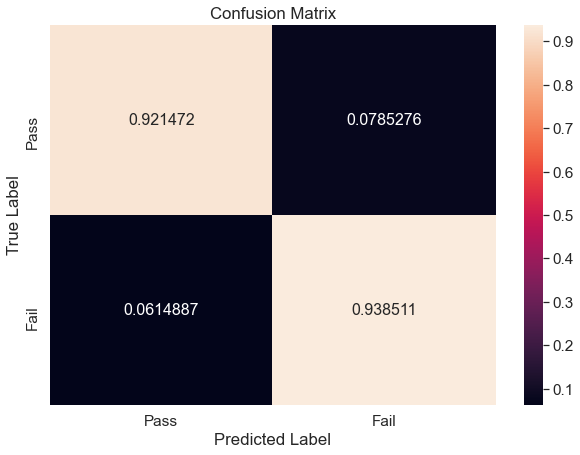

In [49]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Model 3: Logistic Regression

In [27]:
# create a model
logit_reg = LogisticRegression()

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

y_pred = logit_model.predict(X_validate)

param_grid = {'penalty': ['l1', 'l2', 'elasticnet'],
             'C': np.arange(.01, .11, .01),
               'fit_intercept': ['True', 'False'],
             'solver': ['liblinear', 'saga']}

logit_grid = GridSearchCV(logit_model, param_grid, cv=3, iid=False)
logit_grid.fit(X_train, y_train)

best_index = np.argmax(logit_grid.cv_results_["mean_test_score"])
best_logit_pred = logit_grid.best_estimator_.predict(X_validate)

print(logit_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_logit_pred, y_validate))

{'C': 0.01, 'fit_intercept': 'True', 'penalty': 'l1', 'solver': 'saga'}
Validation Accuracy 0.9242572641201436


Rerunning the model with the hyperparameters identified above.

In [26]:
# create a model
logit_reg = LogisticRegression(C = 0.01,
                              fit_intercept = True,
                              penalty = 'l1',
                              solver = 'saga')

# fit the model
logit_model = logit_reg.fit(X_train, y_train)

y_pred = logit_model.predict(X_validate)

Plotting the most important coefficients to see how they compare with our previous models. It appears that serious Count is again the most important feature following by critical Count.

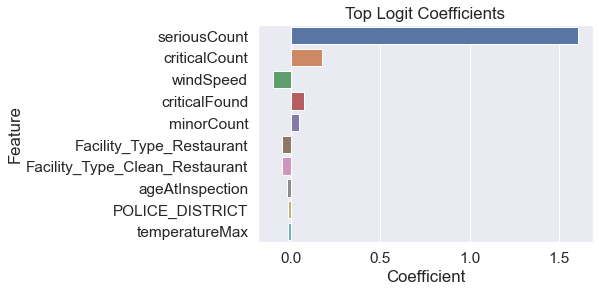

In [53]:
logit_data = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logit_model.coef_))], axis = 1)
logit_data.columns = ['Feature', 'Coefficient']
logit_data['abs_coef'] = abs(logit_data['Coefficient'])
sns.barplot(x="Coefficient", y="Feature", data=logit_data.nlargest(10, 'abs_coef')).set_title("Top Logit Coefficients")
plt.show()

To visualize how our model performed, we check out the confusion matrix.

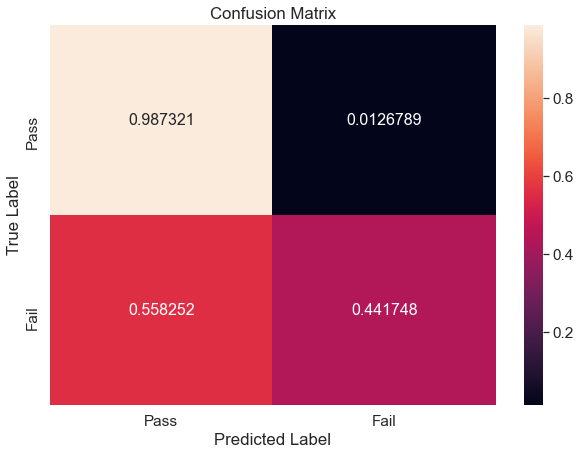

In [51]:
cf_matrix = confusion_matrix(y_validate, y_pred, normalize = "true")

df_cm = pd.DataFrame(cf_matrix, range(2),
                  range(2))

df_cm = df_cm.rename(index=str, columns={0: "Pass", 1: "Fail"})
df_cm.index = ["Pass", "Fail"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

The logistic regression is the worst performing: it correctly predicts restaurants that fail just 44 percent of the time compared with 94 percent accuracy for SVM and 96 percent accuracy for the random forest classifier.

## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

We tried a few different options for this part of the assignment to assess whether our answer changes. We first estimate the metrics using cross_validate.

In [45]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy','precision', 'recall', 'f1']
models = [rf_classifier, dt_reduced_classifier, svm, logit_reg]
avg_dics = []

for model in models:
    # generate a list of dictionaries where each element is for a separate model
    # and contains a separate array for each validation metric
    scores = cross_validate(model, X, y.ravel(), cv=5,
                        scoring=scoring, return_train_score=False)
    avgDict = {} # create an empty dictionary to populate with means
    # for model and value in the list of dictionaries of scores we just generated
    for k,v in scores.items():
        v_mean = v.mean() # take the mean value of each array
        avgDict[k] = v_mean # assign it to an element of an empty dictionary
    
    avg_dics.append(avgDict) # append that dictionary to an empty list

In [46]:
df = pd.DataFrame(avg_dics) # convert to dataframe
df['model'] = ['random forest','decision tree', 'svm', 'logit']
df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,model
0,21.626234,0.089869,0.921625,0.735235,0.956598,0.831085,random forest
1,0.662829,0.049677,0.921821,0.735775,0.956598,0.831438,decision tree
2,135.256957,25.365532,0.920319,0.737497,0.940075,0.826249,svm
3,40.188715,0.061641,0.873033,0.857085,0.450296,0.584047,logit


Now we estimate our metrics using cross_val_score().

In [ ]:
# first we create a series of lists that we will populate in the for-loop
trained_models = [rf_classifier, svm, logit_reg]
metrics = ['accuracy', 'precision', 'recall', 'f1']
accuracy = []
precision = []
recall = []
f1 = []

for model in trained_models:
    accuracy.append(cross_val_score(model, X, y, scoring = 'accuracy', cv = 5))
for model in trained_models:
    precision.append(cross_val_score(model, X, y, scoring = 'precision', cv = 5))
for model in trained_models:
    recall.append(cross_val_score(model, X, y, scoring = 'recall', cv = 5))
for model in trained_models:
    f1.append(cross_val_score(model, X, y, scoring = 'f1', cv = 5))

# now adding metrics for the reduced decision tree model on X_reduced
for metric in metrics:
    if metric=='accuracy':
        accuracy.append(cross_val_score(dt_reduced_classifier, X_reduced, y, scoring = metric, cv = 5))
    if metric=='precision':
        precision.append(cross_val_score(dt_reduced_classifier, X_reduced, y, scoring = metric, cv = 5))
    if metric=='recall':
        recall.append(cross_val_score(dt_reduced_classifier, X_reduced, y, scoring = metric, cv = 5))
    if metric=='f1':
        f1.append(cross_val_score(dt_reduced_classifier, X_reduced, y, scoring = metric, cv = 5))

In [ ]:
# turning the arrays generated by the cross validation above into mean scores for each metric
ave_accuracy = [np.mean(accuracy[0]), np.mean(accuracy[1]), np.mean(accuracy[2]), np.mean(accuracy[3])]
ave_precision = [np.mean(precision[0]), np.mean(precision[1]), np.mean(precision[2]), np.mean(precision[3])]
ave_recall = [np.mean(recall[0]), np.mean(recall[1]), np.mean(recall[2]), np.mean(recall[3])]
ave_f1 = [np.mean(f1[0]), np.mean(f1[1]), np.mean(f1[2]), np.mean(f1[3])]

# assigning to a data frame for easy comparison
models = ['Random Forest', 'SVM', 'Logistic Regression', 'Decision Tree (reduced)']
model_scores = list(zip(models, ave_accuracy, ave_precision, ave_recall, ave_f1))
models_df = pd.DataFrame(model_scores, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
models_df

We opted to prioritize recall because we are concerned about the proportion of actual positives (in our case, restaurants that failed) that were identified correctly. As shown in the tables above, the random forest/reduced decision tree models perform better across the board except for the precision metric. The precision metric is the only one where logistic regression outperforms our tree-based models. 

Using cross_val_score, we find that when the logistic model predicts a restaurant fails inspection, it is correct 77% of the time (compared with 74% for the random forest). But the logistic model correctly identifies only 85% of all restaurants that fail inspections (compared with 96% for the random forest). Even when looking at the F1 score, or the precision-recall tradeoff, the random forest and decision tree perform better than the SVM or the logistic regression.

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

We opted to include feature importance/coefficient plots in the models section above so that we could run the reduced decision tree classifier with the validation metrics. Overall, seriousCount is the most important feature in both the logistic regression and the random forest models. MinorCount was also in the top 5 most important features across the two models.

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

(1) Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities.

We choose the reduced classifier produced from the random forest, because it performed best according to XYZ metric.

In [25]:
probas = dt_reduced_classifier.fit(X, y.ravel()).predict_proba(X)[:,1] # predict probabilities of failing for each audit

(2) Order your audits by their probability of detecting a "Fail" score

In [26]:
X['predict_prob_fail'] = probas # add as column to original training dataset -- this is the right dataset, yes?
# add back in results column
X['Results'] = chicago_inspections_2011_to_2013['Results']
X['Results'] = X['Results'].replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
X['Results'] = lb_style.fit_transform(X['Results'])
X['Results'] = np.where(X['Results'] == 1, 0 ,1) # Recode 0s and 1s so 1s are "Fail"

top1k = X.sort_values(by=['predict_prob_fail'], ascending=False).head(1000) # sort by predicted prob and get top 1000 observations

(3) Plot your distribution of pass/fail among the first 1000 observations in the dataset

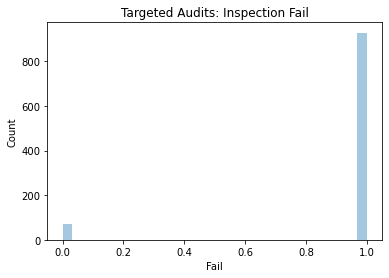

In [27]:
ax = sns.distplot(top1k['Results'], kde = False) 
ax.set_title("Targeted Audits: Inspection Fail")
ax.set(xlabel='Fail', ylabel='Count')
plt.show()

In [ ]:
scores = cross_val_score(dt_reduced_classifier, top1k.drop(columns = ['Results'], axis = 1),
                         top1k['Results'].ravel(), cv=5, scoring = 'recall')
scores.mean()

The reduced decision tree model does extremely well by our chosen metric, recall -- 99.6% of restaurants that were predicted to fail the inspection actually failed. This bodes well for our targeted audit. 

(4) Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

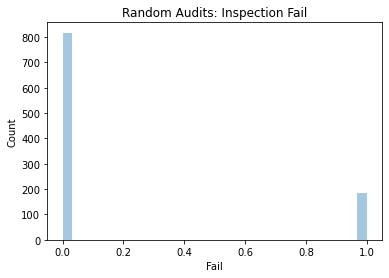

In [28]:
random1k = X.sample(n=1000) # randomly sample 1000 observations

ax = sns.distplot(random1k['Results'], kde = False) # I think it still works to plot the dist of y here (binarized results)
ax.set_title("Random Audits: Inspection Fail")
ax.set(xlabel='Fail', ylabel='Count')
plt.show()

Comparing the distributions of a randomly selected subset of 1000 restaurants, and a subset of 1000 selected by targeting those our model predicts are most likely to fail, our model does significantly better than random selection at capturing restaurants that actually failed inspection.

We then use the same metric to evaluate our random audit strategy.

In [34]:
scores = cross_val_score(dt_reduced_classifier, random1k.drop(columns = ['Results'], axis = 1),
                         random1k['Results'].ravel(), cv=5, scoring = 'recall')
scores.mean()

0.9178678678678679

As expected, the random audit strategy does not do as well by this metric -- only 91.8% of restaurants that were predicted to fail the inspection actually did.

### Predict on Data with Unseen Labels

First, we drop missing values in our test data set. Then, we keep only the features that our training data set and our test data set share.

In [39]:
X_test = X_test.dropna() # as with the training data, drop missing values

# Fill in the code below with the X data you used for training
X_test = X_test[X_test.columns & X_reduced.columns] # add X_reduced that was used for the dt_reduced_classifier

In [40]:
len(X_test.columns) # check for the correct number of features

6

In [ ]:
len(X_reduced.columns) # good!

We then can predict on unseen labels.

In [42]:
dt_model = dt_reduced_classifier.fit(X_reduced, y.ravel()) # store the model fitted on X_reduced
labels_2014 = dt_model.predict(X_test) # predict on unseen labels

In [47]:
len(labels_2014)

3938

In [ ]:
len(X_test) # good!

Finally, we output our new labels as a .csv file.

In [ ]:
X_test.to_csv(index=False)